In [1]:
"""
Non-parametric
Entropy based MNIST Classifier 
Stage1 : saving MNIST Traing data entropy
"""
import torch 
import torchvision #[Role]:???
from torch.utils.data import Dataset, DataLoader



/home/dhlee/anaconda3/envs/dh1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os 
import time 
import pickle 
import random
import numpy as np 
import argparse
import datetime 
from tqdm import tqdm 
from distutils.util import strtobool
from omegaconf import OmegaConf
import easydict


In [82]:
class MNISTWarpper(Dataset):
    def __init__(self, root, train, transform):
        self.data = torchvision.datasets.MNIST(root=root, train=train, transform=transform, download=True)
    
    def __getitem__(self, x):
        return self.data[x]
    
    def __len__(self):
        return len(self.data)

def compute_entropy(digit_image):
    assert digit_image.size() == (1, 1, 28,28)
    digit_image = digit_image.flatten()
    digit_image = digit_image / digit_image.sum() #[Role]:???
    assert abs(digit_image.sum() - 1.0) < 1e-5, digit_image.sum() #[Role]:???
    entropy =  (- digit_image * torch.nan_to_num(digit_image.log())).sum() # \sum - p log p 
    assert entropy >=0
    return entropy 

In [102]:
flags

{'data_path': 'untracked', 'config': 'config.yaml', 'post_fix': '', 'seed': 0, 'no_date': True, 'date': '2023_02_06-15_14_49', 'save_dir': 'results/seed-0', 'start_time': 1675664089.478833}

In [25]:
 
args = easydict.EasyDict({
        'data_path': 'untracked',        
        'config': 'config.yaml', 
        'post_fix': '', 
        'seed': 0, 
        'no_date': True, 
 
})

In [27]:


flags = OmegaConf.load('./config.yaml')
for key in vars(args):
    setattr(flags, key, getattr(args, key))

random.seed(flags.seed)
np.random.seed(flags.seed)
torch.manual_seed(flags.seed)
torch.backends.cudnn.deterministic = True


flags.date = datetime.datetime.now().strftime(format="%Y_%m_%d-%H_%M_%S")
flags.save_dir = f"results/seed-{flags.seed}"
if not flags.no_date: #[Role]:???
    flags.save_dir = flags.save_dir + f"-{flags.date}"
flags.start_time = time.time()

print(flags) 

# if not os.path.exists(flags.save_dir):
#     os.makedirs(flags.save_dir)
# OmegaConf.save(flags, f'{flags.save_dir}/config.yaml')

{'data_path': 'untracked', 'config': 'config.yaml', 'post_fix': '', 'seed': 0, 'no_date': True, 'date': '2023_02_06-15_14_49', 'save_dir': 'results/seed-0', 'start_time': 1675664089.478833}


In [105]:
# ==== 🔖 Running the Experiment ====
CLS_ENTROPY = [[] for i in range(10)] # holder for the entropy for class samples
SAMPLE_INDEX = [[] for i in range(10)] #[Role]:???

train_dataset = MNISTWarpper(flags.data_path, train=True, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=1) #[Role]:???
pbar = tqdm(enumerate(train_loader))
for i,(x,y) in pbar:
    entropy = compute_entropy(x) #[Role]:???
    CLS_ENTROPY[y.item()].append(compute_entropy(x))
    SAMPLE_INDEX[y.item()].append(i)
    # duration = time.strftime("%H:%M:%S", time.gmtime(time.time()-flags.start_time))
    # pbar.set_description(f"[INFO]🧪{__file__}|🍀{flags.save_dir}|⌛️N:({i:.2E}) P:({i / len(train_dataset)*100:.2f}%) D:({duration})|")

for i in range(10):
    print(f'{i} :  {len(CLS_ENTROPY[i])}')

# post process for saving CLS as tensor
MIN_SIZE = min([len(CLS_ENTROPY[i]) for i in range(10)]) #[Role]:???

for i in range(10):
    print(f"[INFO] {i}-th class {len(CLS_ENTROPY[i])} --> {MIN_SIZE}")
    CLS_ENTROPY[i] = torch.tensor(CLS_ENTROPY[i][:MIN_SIZE])
    SAMPLE_INDEX[i] = SAMPLE_INDEX[i][:MIN_SIZE]
CLS_ENTROPY = torch.stack(CLS_ENTROPY)
# print(f"[INFO] '{flags.save_dir}/cls_entropy.pkl' tensor size: {CLS_ENTROPY.size()}")

# # Savae the result 
# with open(f'{flags.save_dir}/cls_entropy.pkl', 'wb') as f:
#     print(f"[INFO] saved '{flags.save_dir}/cls_entropy.pkl'")
#     pickle.dump(CLS_ENTROPY, f)
    
# with open(f'{flags.save_dir}/sample_index.pkl', 'wb') as f:
#     print(f"[INFO] saved '{flags.save_dir}/sample_index.pkl'")
#     pickle.dump(SAMPLE_INDEX, f)
# OmegaConf.save(flags, f'{flags.save_dir}/config.yaml')

60000it [00:20, 2994.90it/s]


0 :  10
1 :  10
2 :  10
3 :  10
4 :  10
5 :  10
6 :  10
7 :  10
8 :  10
9 :  10
[INFO] 0-th class 5923 --> 5421
[INFO] 1-th class 6742 --> 5421
[INFO] 2-th class 5958 --> 5421
[INFO] 3-th class 6131 --> 5421
[INFO] 4-th class 5842 --> 5421
[INFO] 5-th class 5421 --> 5421
[INFO] 6-th class 5918 --> 5421
[INFO] 7-th class 6265 --> 5421
[INFO] 8-th class 5851 --> 5421
[INFO] 9-th class 5949 --> 5421


In [76]:
a = train_dataset.__getitem__(0)
len(a)

a1 = a[0]
b2 = a[1]
# c3= a[2]
# # len(a)
# print(max(a))
# print(sum(a))
# # print(min(a))

# print(a.type())
# # print(a.size())

In [79]:
b2

5

In [41]:
import matplotlib.pyplot as plt

AttributeError: 'int' object has no attribute 'squeeze'

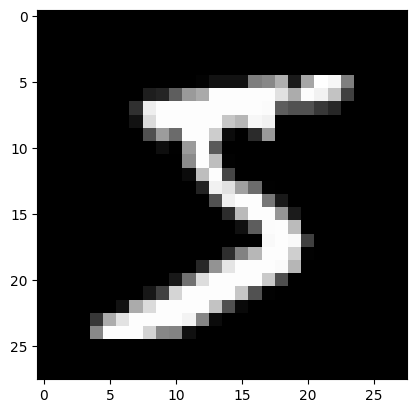

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure()
plt.imshow(a1.squeeze(), cmap="gray")
plt.figure()
plt.imshow(b2.squeeze(), cmap="gray")

In [53]:
a

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [60]:
digit_image = a
digit_image = digit_image.reshape((1, 1, 28, 28))
print(digit_image.size())

assert digit_image.size() == (1, 1, 28,28)
digit_image = digit_image.flatten()
print(digit_image.size())

digit_image = digit_image / digit_image.sum() #[Role]:???
print(sum(digit_image))
print(sum(a.flatten()))

torch.Size([1, 1, 28, 28])
torch.Size([784])
tensor(1.0000)
tensor(107.9412)


In [92]:
a.size

AttributeError: 'tuple' object has no attribute 'size'

In [96]:
def compute_entropy111(digit_image):
    # assert digit_image.size() == (1, 1, 28,28)
    digit_image = digit_image.flatten()
    digit_image = digit_image / digit_image.sum() #[Role]:???
    assert abs(digit_image.sum() - 1.0) < 1e-5, digit_image.sum() #[Role]:???
    print(digit_image.log())
    print(torch.nan_to_num(digit_image.log()))
    entropy =  (- digit_image * torch.nan_to_num(digit_image.log())).sum() # \sum - p log p 
    print(entropy)
    # assert entropy >=0
    return entropy 

def compute_entropy222(digit_image):
    # assert digit_image.size() == (1, 1, 28,28)
    digit_image = digit_image.flatten()
    # digit_image = digit_image / digit_image.sum() #[Role]:???
    # assert abs(digit_image.sum() - 1.0) < 1e-5, digit_image.sum() #[Role]:???
    print(digit_image.log())
    print(torch.nan_to_num(digit_image.log()))
    entropy =  (- digit_image * torch.nan_to_num(digit_image.log())).sum() # \sum - p log p 
    print(entropy)
    # assert entropy >=0
    return entropy 

In [101]:
a1 = a[0]
a2 = a[0]

# compute_entropy111(a1)
compute_entropy222(a2)

tensor([   -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -i

tensor(25.2081)